<a href="https://colab.research.google.com/github/DanielFirman/bank_churn/blob/main/customer_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- CLIENTNUM: ID unik untuk setiap klien.
- Attrition_Flag: Status churn (jika nasabah keluar atau tetap).
- Customer_Age: Usia nasabah.
- Gender: Jenis kelamin nasabah.
- Dependent_count: Jumlah tanggungan.
- Education_Level: Tingkat pendidikan.
- Marital_Status: Status pernikahan.
- Income_Category: Kategori pendapatan.
- Card_Category: Kategori kartu kredit.
- Months_on_book: Lama waktu menjadi nasabah.
- Total_Relationship_Count: Jumlah produk yang dimiliki nasabah.
- Months_Inactive_12_mon: Jumlah bulan tidak aktif dalam 12 bulan terakhir.
- Contacts_Count_12_mon: Jumlah kontak dalam 12 bulan terakhir.
- Credit_Limit: Limit kredit.
- Total_Revolving_Bal: Total saldo berputar.
- Avg_Open_To_Buy: Rata-rata jumlah yang bisa digunakan untuk belanja.
- Total_Amt_Chng_Q4_Q1: Perubahan total jumlah transaksi dari kuartal 4 ke kuartal 1.
-Total_Trans_Amt: Total jumlah transaksi.
- Total_Trans_Ct: Total jumlah transaksi.
- Total_Ct_Chng_Q4_Q1: Perubahan jumlah transaksi dari kuartal 4 ke kuartal 1.
- Avg_Utilization_Ratio: Rata-rata rasio penggunaan kredit



# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd


In [5]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.iloc[:,:-2]

In [10]:
df.drop(columns = 'CLIENTNUM', inplace = True)

In [11]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
categorical_cols = df.select_dtypes(include = ['object']).columns
numerical_cols = df.select_dtypes(include= ['int64','float64']).columns

In [13]:
print('categorical columns:',categorical_cols)
print('numerical columns:',numerical_cols)

categorical columns: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
numerical columns: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [14]:
for column in df[categorical_cols]:
    unique_values = df[column].unique()
    print(f'unique values in {column}:{unique_values}')

unique values in Attrition_Flag:['Existing Customer' 'Attrited Customer']
unique values in Gender:['M' 'F']
unique values in Education_Level:['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
unique values in Marital_Status:['Married' 'Single' 'Unknown' 'Divorced']
unique values in Income_Category:['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
unique values in Card_Category:['Blue' 'Gold' 'Silver' 'Platinum']


In [15]:
for column in df[categorical_cols]:
    print(df[column].value_counts())
    print('--------')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
--------
Gender
F    5358
M    4769
Name: count, dtype: int64
--------
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
--------
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
--------
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
--------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
--------


In [16]:
df= df[df['Income_Category']!='Unknown']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9015 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9015 non-null   object 
 1   Customer_Age              9015 non-null   int64  
 2   Gender                    9015 non-null   object 
 3   Dependent_count           9015 non-null   int64  
 4   Education_Level           9015 non-null   object 
 5   Marital_Status            9015 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             9015 non-null   object 
 8   Months_on_book            9015 non-null   int64  
 9   Total_Relationship_Count  9015 non-null   int64  
 10  Months_Inactive_12_mon    9015 non-null   int64  
 11  Contacts_Count_12_mon     9015 non-null   int64  
 12  Credit_Limit              9015 non-null   float64
 13  Total_Revolving_Bal       9015 non-null   int64  
 14  Avg_Open_To_

# EDA

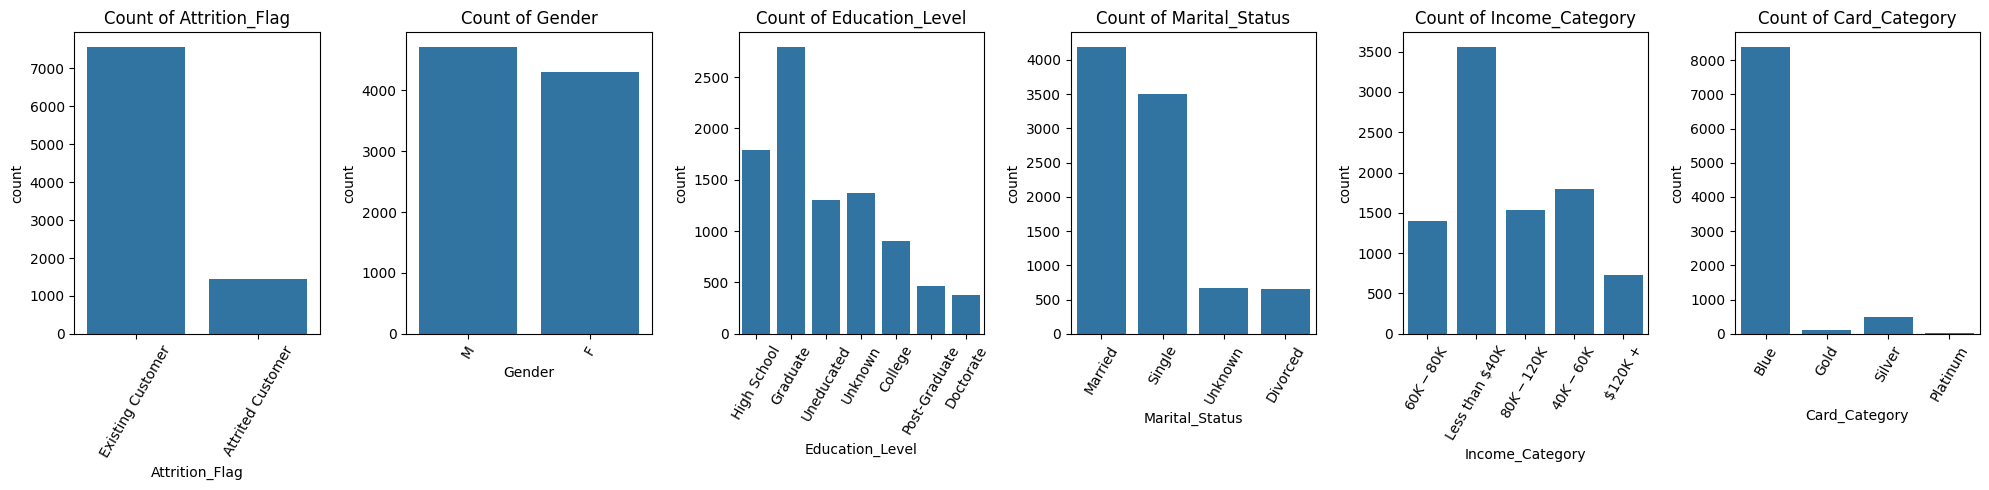

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

for i, column in enumerate(df.select_dtypes(include = ['object'])):  # Exclude the dependent variable
    plt.subplot(1, 6, i + 1)
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [19]:
df['Marital_Status']= df['Marital_Status'].replace('Divorced','Single')

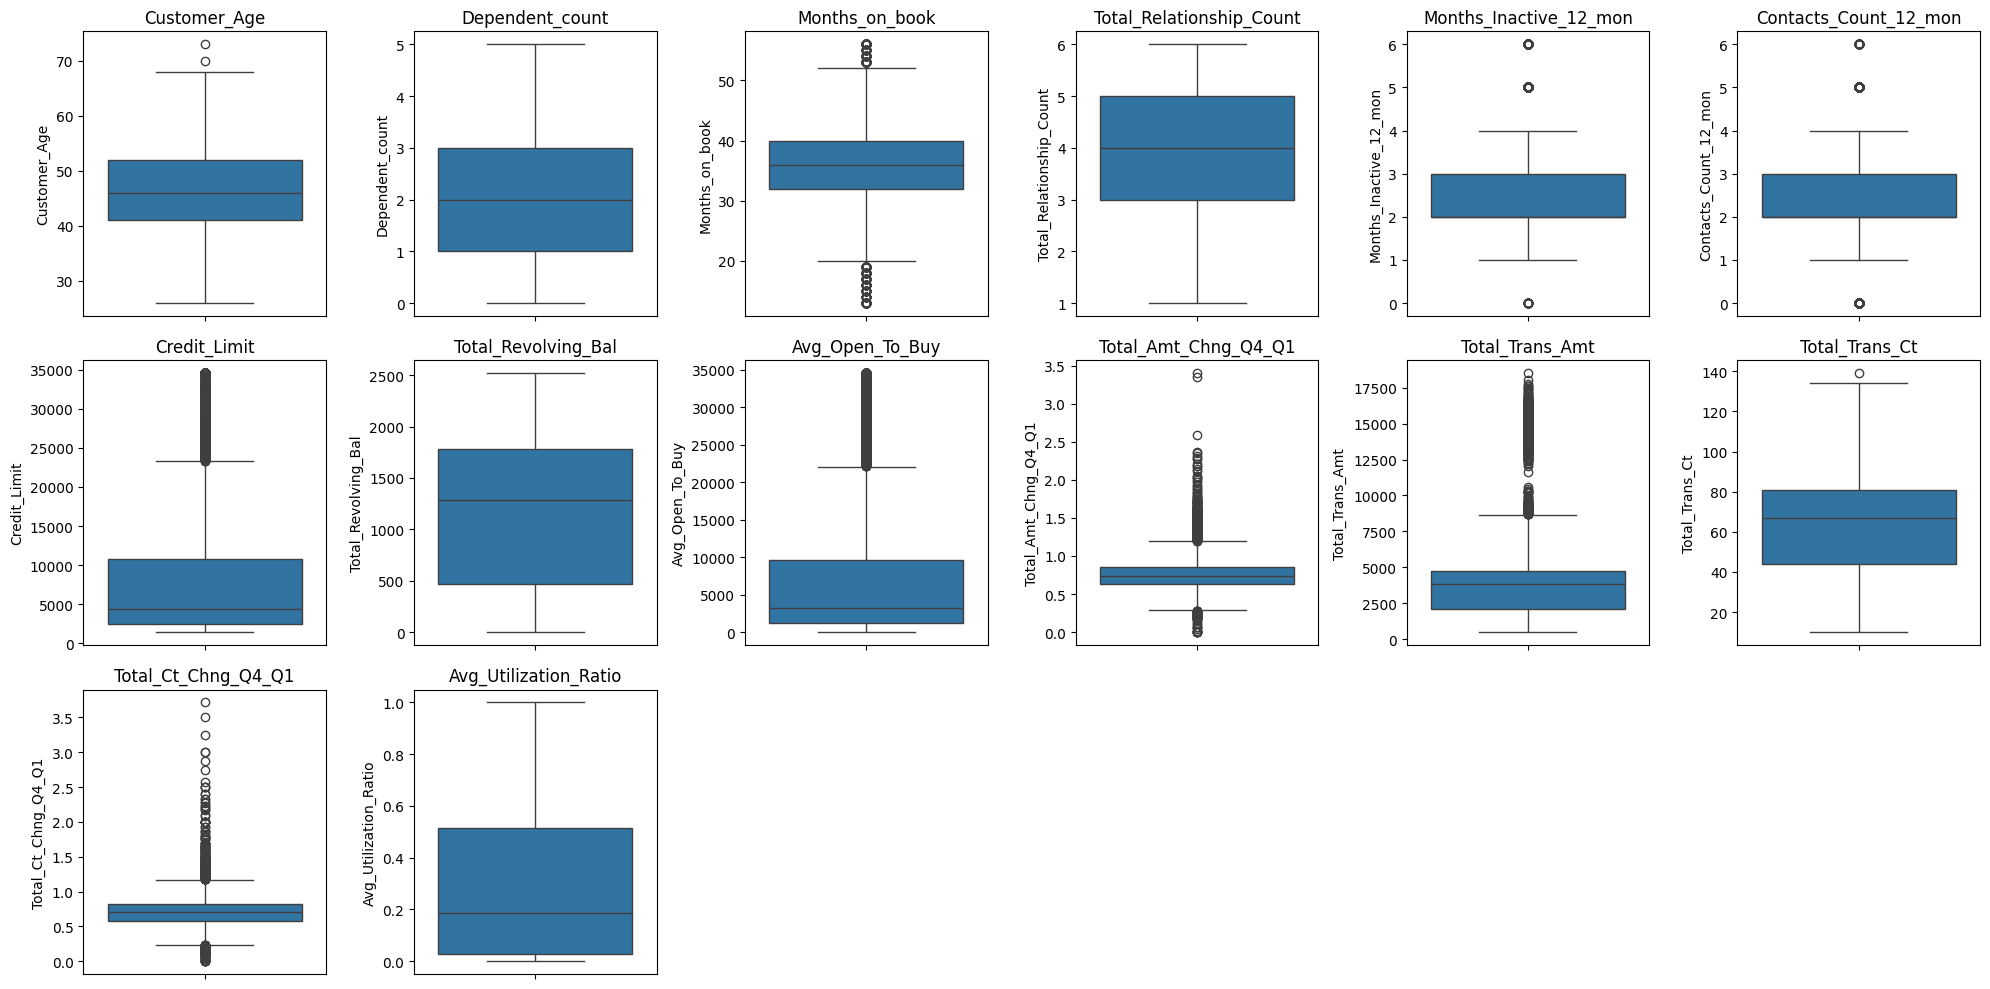

In [20]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(df.select_dtypes(include = ['int64','float64'])):
    plt.subplot(3,6 , i + 1)
    sns.boxplot(y=column, data=df)
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()  # Adjust the layout
plt.show()

In [21]:
df['Total_Ct_Chng_Q4_Q1'].describe()

count    9015.000000
mean        0.711537
std         0.237312
min         0.000000
25%         0.582000
50%         0.702000
75%         0.818000
max         3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

In [22]:
df = df[df['Total_Ct_Chng_Q4_Q1'] <2.5]
df = df[df['Total_Amt_Chng_Q4_Q1'] <2.5]
df = df[df['Total_Trans_Ct']<138]

In [23]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()


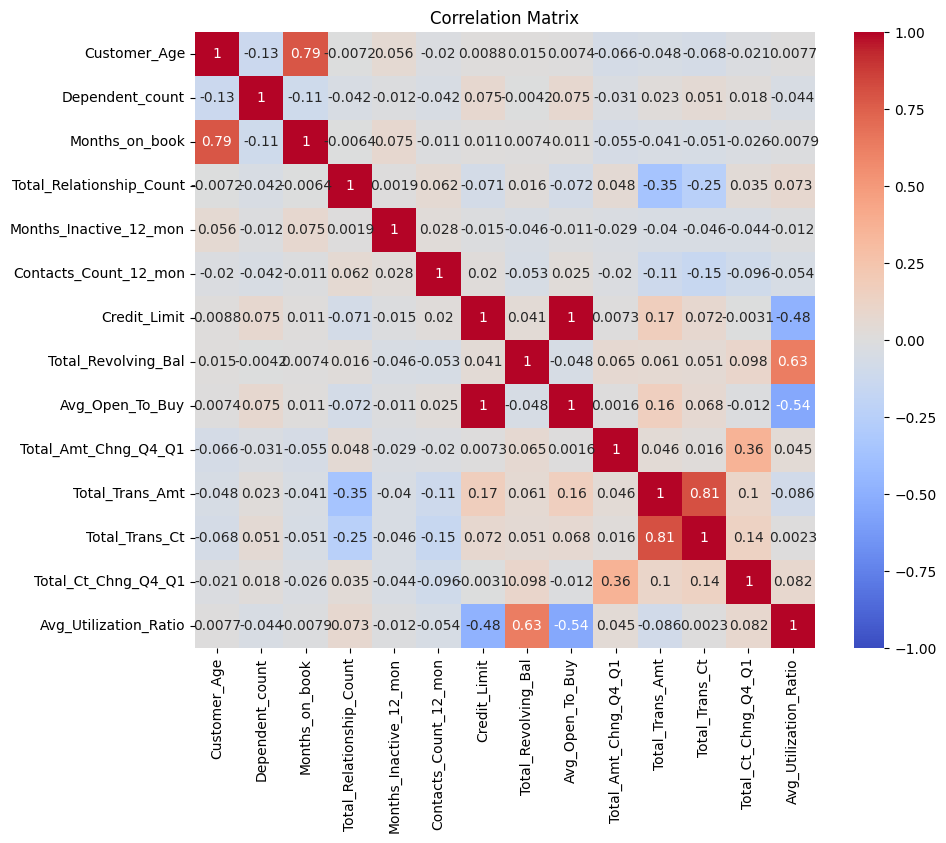

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Encode

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Education_Level_encoded'] = label_encoder.fit_transform(df['Education_Level'])
df['Marital_Status_encoded'] = label_encoder.fit_transform(df['Marital_Status'])

df_encoded = pd.get_dummies(df, columns=['Gender', 'Income_Category', 'Card_Category'])

education_level_map = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
df['Education_Level_encoded'] = df['Education_Level'].map(education_level_map)



# Modeling

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.89      0.80      0.84       292
Existing Customer       0.96      0.98      0.97      1509

         accuracy                           0.95      1801
        macro avg       0.93      0.89      0.91      1801
     weighted avg       0.95      0.95      0.95      1801

Confusion Matrix:
[[ 233   59]
 [  29 1480]]


Attrited Customer':
Precision: 0.89
Recall: 0.80
F1-score: 0.84

Existing Customer
Precision: 0.96
Recall: 0.98
F1-score: 0.97

 model ini dapat digunakan untuk mengidentifikasi pelanggan yang memiliki risiko tinggi untuk meninggalkan bank, sehingga bank dapat mengambil tindakan pencegahan atau strategi retensi yang sesuai.

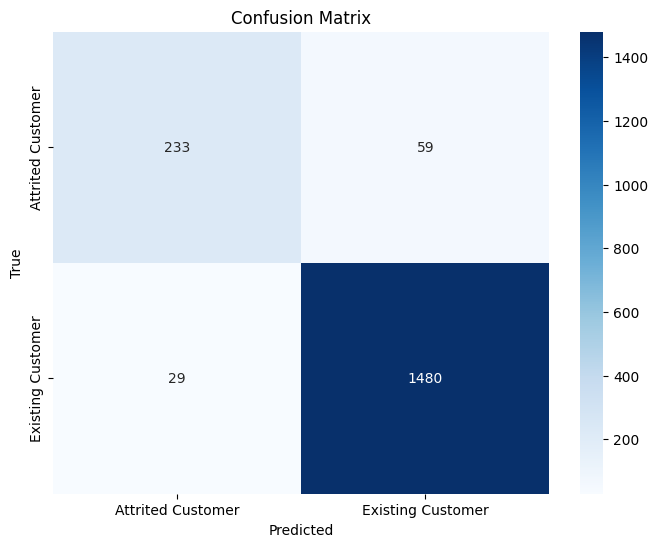

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Attrited Customer', 'Existing Customer'], yticklabels=['Attrited Customer', 'Existing Customer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


insight

**- Strategi Retensi**: Setelah mengidentifikasi kelompok pelanggan dengan risiko tinggi, terapkan strategi retensi yang sesuai. Misalnya, penawaran khusus, program loyalitas, atau layanan pelanggan yang ditingkatkan.

**- Komunikasi Proaktif**: Jalin komunikasi secara proaktif dengan pelanggan yang menunjukkan tanda-tanda ingin meninggalkan bank. Dengarkan masukan mereka dan berikan solusi atau penawaran yang dapat mempertahankan mereka.

**- Peningkatan Layanan**: Pastikan layanan dan pengalaman pelanggan yang optimal. Perbaiki proses klaim, penanganan transaksi, dan ketersediaan layanan untuk memastikan kepuasan pelanggan.

**- Penggunaan Teknologi**: Manfaatkan teknologi seperti machine learning untuk mengidentifikasi pola dan tren yang mengindikasikan pelanggan potensial yang ingin meninggalkan bank.